# Introduzione al Machine Learning 2023-2024
## Bernardini Jacopo, Ciocca Giorgio, Marini Tommaso
## Exam Project, First Part: Data Exploration, Clustering  and Classification

## 1) Data Exploration

Libraries import

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
from sklearn import metrics

AttributeError: module 'pandas' has no attribute 'compat'

File reading and substitution of 'notknown' values with NaNs 

In [ ]:
filename = r'C:\Users\Utente\OneDrive\Desktop\MachineLearning\pums.csv'
data = pd.read_csv(filename, na_values='notknown')
data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,True
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,False
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,True
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,True


In [ ]:
data[data.isnull().sum(axis=1)>1]

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
89,48.0,19.0,3.0,16.0,2.0,0.0,1.0,3.0,4.0,1.0,NaN,2.0,NaN,2.0,2.0,False
128,64.0,12.0,2.0,NaN,1.0,0.0,1.0,1.0,4.0,1.0,1.0,1.0,NaN,2.0,1.0,False
135,45.0,12.0,5.0,NaN,2.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,2.0,1.0,False
212,25.0,19.0,5.0,16.0,2.0,0.0,1.0,3.0,4.0,1.0,NaN,NaN,2.0,2.0,1.0,False
230,92.0,NaN,1.0,16.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746268,59.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,NaN,2.0,NaN,2.0,2.0,True
746277,12.0,9.0,5.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,NaN,NaN,2.0,2.0,2.0,False
746298,54.0,NaN,1.0,1.0,2.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,2.0,1.0,True
746323,63.0,16.0,1.0,1.0,2.0,0.0,NaN,1.0,4.0,1.0,NaN,2.0,2.0,2.0,2.0,True


Replace Boolean target variable with O and 1


In [ ]:
data=data.replace({False:0, True:1})
data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,0
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,0
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,1
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1


First data check

In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
AGEP        746336 non-null float64
SCHL        709133 non-null float64
MAR         746336 non-null float64
RELP        709213 non-null float64
DIS         746336 non-null float64
ESP         746336 non-null float64
CIT         709287 non-null float64
MIG         746336 non-null float64
MIL         746336 non-null float64
ANC         746336 non-null float64
NATIVITY    708813 non-null float64
DEAR        708974 non-null float64
DEYE        709267 non-null float64
DREM        746336 non-null float64
SEX         746336 non-null float64
ESR         746336 non-null int64
dtypes: float64(15), int64(1)
memory usage: 91.1 MB


AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR        37362
DEYE        37069
DREM            0
SEX             0
ESR             0
dtype: int64

In [ ]:
data.corr()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
AGEP,1.000000,0.526318,-0.652526,-0.160553,-0.319932,-0.495892,0.136805,-0.094053,0.610013,-0.075151,0.159861,-0.240264,-0.127749,0.297545,0.045604,0.108214
SCHL,0.526318,1.000000,-0.437045,-0.106178,-0.034417,-0.534254,0.013117,0.051095,0.710749,-0.055516,0.026687,-0.036743,-0.002851,0.508846,0.020629,0.433160
MAR,-0.652526,-0.437045,1.000000,0.324343,0.084751,0.395482,-0.197440,0.091173,-0.486286,0.067081,-0.212588,0.100159,0.034025,-0.243272,-0.037797,-0.236155
RELP,-0.160553,-0.106178,0.324343,1.000000,-0.090447,0.028915,-0.007710,0.202360,-0.026641,0.051846,-0.018830,-0.004358,-0.043709,-0.090742,-0.041623,-0.141054
DIS,-0.319932,-0.034417,0.084751,-0.090447,1.000000,0.093754,0.037943,-0.000815,-0.102686,-0.006058,0.031085,0.512855,0.405873,0.190759,-0.004698,0.209605
ESP,-0.495892,-0.534254,0.395482,0.028915,0.093754,1.000000,-0.139069,-0.016679,-0.650507,0.037561,-0.145389,0.063005,0.038179,-0.286680,-0.014166,-0.323080
CIT,0.136805,0.013117,-0.197440,-0.007710,0.037943,-0.139069,1.000000,-0.010506,0.210177,-0.154963,0.975068,0.025188,-0.000428,0.109111,0.011768,0.108761
MIG,-0.094053,0.051095,0.091173,0.202360,-0.000815,-0.016679,-0.010506,1.000000,0.041475,0.032566,-0.018573,0.016514,-0.003608,0.034611,-0.011250,0.020511
MIL,0.610013,0.710749,-0.486286,-0.026641,-0.102686,-0.650507,0.210177,0.041475,1.000000,-0.072090,0.217732,-0.041023,-0.047215,0.391905,0.084040,0.455615
ANC,-0.075151,-0.055516,0.067081,0.051846,-0.006058,0.037561,-0.154963,0.032566,-0.072090,1.000000,-0.160468,0.000405,0.001006,-0.050561,0.003481,-0.022187


In [ ]:
data.describe()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
count,746336.000000,709133.000000,746336.000000,709213.000000,746336.000000,746336.000000,709287.000000,746336.000000,746336.000000,746336.000000,708813.000000,708974.000000,709267.000000,746336.000000,746336.000000,746336.000000
mean,40.378314,15.426601,2.995578,2.679022,1.866040,0.617611,1.693518,1.247413,3.080612,1.757976,1.192635,1.960921,1.975131,1.844122,1.507907,0.453035
std,23.374484,6.381558,1.865125,4.336577,0.340609,1.678300,1.390452,0.675038,1.608065,1.097682,0.394369,0.193783,0.155727,0.485527,0.499938,0.497790
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,20.000000,13.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,40.000000,17.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,59.000000,20.000000,5.000000,2.000000,2.000000,0.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,94.000000,24.000000,5.000000,17.000000,2.000000,8.000000,5.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
#data['SCHL'].hist()

In [ ]:
#data['MAR'].hist()

In [ ]:
#data['RELP'].hist(bins=18)
#data[data['RELP']==7].mean()

In [ ]:
#data['DIS'].hist()

In [ ]:
#data['ESP'].hist()

In [ ]:
#data['CIT'].hist()

In [ ]:
#data['MIG'].hist()

In [ ]:
#data['MIL'].hist()

In [ ]:
#data['ANC'].hist()

In [ ]:
#data['NATIVITY'].hist()

In [ ]:
 #data['DEAR'].hist()

In [ ]:
#data['DEYE'].hist()

In [ ]:
#data['DREM'].hist()

In [ ]:
#data['SEX'].hist()

In [ ]:
#data['ESR'].hist()

In [ ]:
#data.corr()

substituted NaN values of DEYE and DEAR with mode

In [ ]:
data['DEYE']=data['DEYE'].fillna(2)
data['DEAR']=data['DEAR'].fillna(2)
data.isna().sum()

AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

dropping every row in which both CIT and NATIVITY are NaNs

In [ ]:
cond = data['CIT'].isna() & data['NATIVITY'].isna()
data = data.loc[~cond]

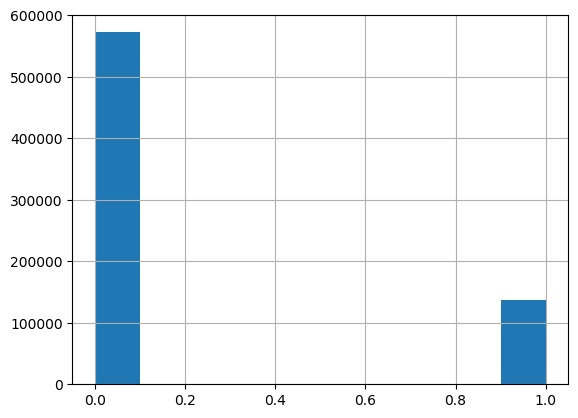

In [ ]:
data['NATIVITY'] = data['NATIVITY'] - 1
data['NATIVITY'].hist()

In [ ]:
#pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

reconstruction of NAT from CIT

In [ ]:
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']<4), 'NATIVITY'] = 0
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']>3), 'NATIVITY'] = 1

checking whether we did everything correctly

In [ ]:
#pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

Fill CIT from correlation with NATIVITY 

In [ ]:
data.loc[(data['CIT'].isnull()) & (data['NATIVITY']==0), 'CIT'] = 1
data.loc[(data['CIT'].isnull()) & (data['NATIVITY']==1), 'CIT'] = np.random.randint(4,5)
data.isna().sum()

AGEP            0
SCHL        37103
MAR             0
RELP        37036
DIS             0
ESP             0
CIT             0
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

In [ ]:
data=data.drop('RELP', axis=1)
data.isna().sum()

AGEP            0
SCHL        37103
MAR             0
DIS             0
ESP             0
CIT             0
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

Fill missing school by correlation with AGE

In [ ]:
#pd.plotting.scatter_matrix(data[['SCHL','AGEP']])

In [ ]:
data['SCHL_mode']=data.groupby('AGEP')['SCHL'].transform(lambda x: x.mode().iloc[0])
data['SCHL']=data['SCHL'].fillna(data['SCHL_mode'])
data.drop('SCHL_mode', axis=1, inplace=True)
data.isna().sum()

AGEP        0
SCHL        0
MAR         0
DIS         0
ESP         0
CIT         0
MIG         0
MIL         0
ANC         0
NATIVITY    0
DEAR        0
DEYE        0
DREM        0
SEX         0
ESR         0
dtype: int64

Checking everything is okay

In [ ]:
#pd.plotting.scatter_matrix(data[['SCHL','AGEP']])

## 2) CLUSTERING

In [ ]:
data_target = data['ESR']
data.drop('ESR', axis=1, inplace=True)

Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(data.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
data_scaled=scaler.transform(data.values)

### K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=300)
kmeans.fit(data_scaled)

KeyboardInterrupt: 

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([593195, 151279], dtype=int64))

In [ ]:
data_target.sum()

337267

Visualization

Parallel coordinates

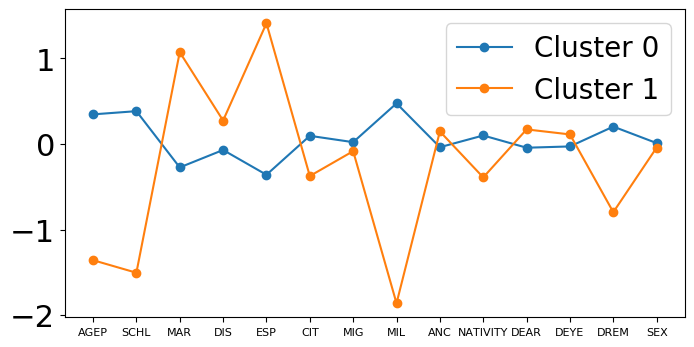

In [ ]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(data.columns)), data.columns, fontsize=8)
plt.legend(fontsize=20)
plt.show()


Labels clustering

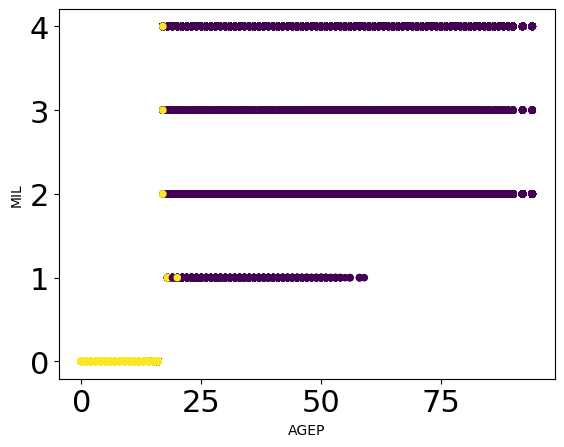

In [ ]:
plt.scatter(data['AGEP'], data['MIL'], 
           c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('AGEP')
plt.ylabel('MIL')
plt.show()

Labels target

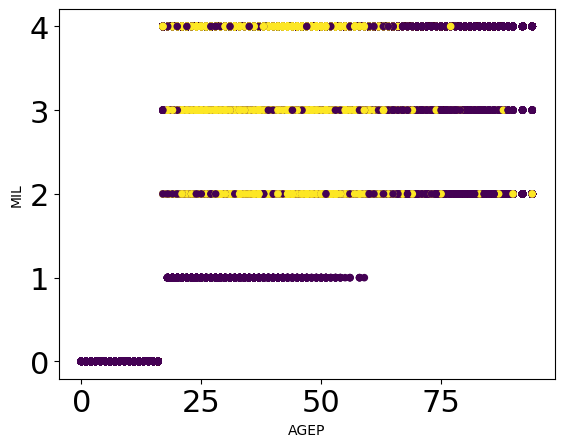

In [ ]:
plt.scatter(data['AGEP'], data['MIL'], 
           c=data_target, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('AGEP')
plt.ylabel('MIL')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == "":


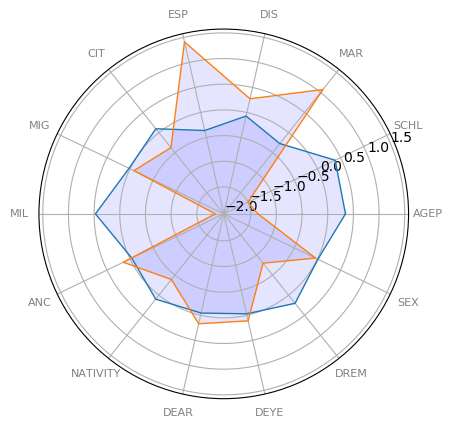

In [ ]:
from math import pi
 
# number of variable
N = len(data.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], data.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


sse evaluation

In [ ]:
print('SSE %s' % kmeans.inertia_)
#print('Silhouette %s' % metrics.silhouette_score(data_scaled, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(data_scaled, kmeans.labels_))
sse_list = list()
max_k = 25
for k in range(2, max_k + 1):
    print(k)
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(data_scaled)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

SSE 8183663.680038075
Separation 1.4302660090250339
2
3
4
5
6


KeyboardInterrupt: 

In [ ]:
sse_list

[8183663.681893597,
 6809366.228086495,
 5884867.545628322,
 5229253.784837404,
 4837234.763636641,
 4256436.6149395425,
 3885033.701068579,
 3561744.664622383,
 3395617.1702704737,
 3102439.98815592,
 3038769.367933412,
 2885838.546085991,
 2787725.2142382045,
 2664008.441560707,
 2573776.2869061357,
 2480107.992592203,
 2451903.151352782,
 2333407.8658436886,
 2308766.454327959,
 2190443.93477559,
 2153149.921610959,
 2114667.775857869,
 2056390.4426621543,
 2064260.2369501994]

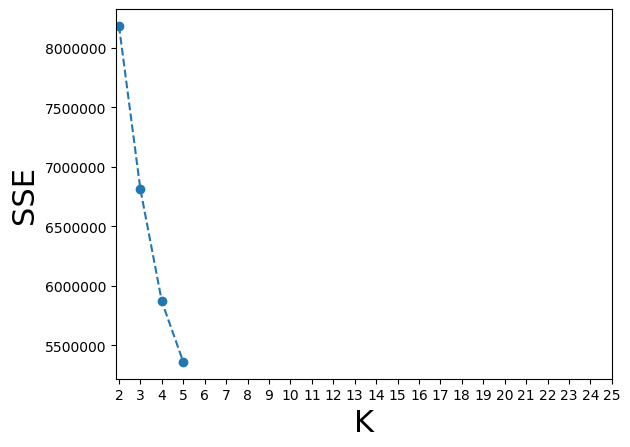

In [ ]:
plt.plot(range(2, len(sse_list) + 2), sse_list, 'o--')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.show()

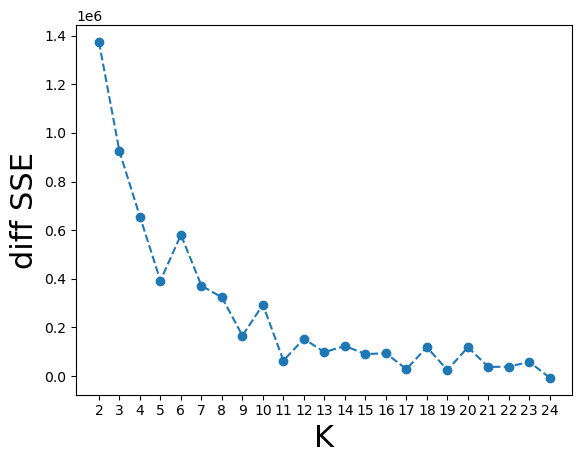

In [ ]:
diff = []
for i in range(len(sse_list)-1):
    diff.append(-sse_list[i+1]+sse_list[i])
plt.plot(range(2, len(sse_list) + 1), diff, 'o--')
plt.ylabel('diff SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.show()

Le differenze tra le sse non cambiano più quando k=11, quindi è quello ottimale

External evaluation

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Similarity between assignments
metrics.adjusted_rand_score(data_target, kmeans.labels_)

0.08960194794404298

In [ ]:
#are cluster composed of objects with the same real labels?
metrics.homogeneity_score(data_target, kmeans.labels_) #homogenity score

0.19114767043999156

In [ ]:
#are real labels concentrated in specific clusters?
metrics.completeness_score(data_target, kmeans.labels_)

0.2607885600147016

In [ ]:
#harmonic mean between completeness_score and homogeneity_score
metrics.v_measure_score(data_target, kmeans.labels_, beta=2) 

0.2325472258978556

famo la confusion matrix

In [ ]:
metrics.confusion_matrix(data_target, kmeans.labels_)

array([[257497, 149710],
       [335698,   1569]], dtype=int64)

In [ ]:
### DBSCAN
#non si fa perche fa caa dioporco scan

### Hierirchical clustering dislessico porcodio

In [ ]:
### Gerarchia dei Cumulanti italici
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

#prendo un po' di dati random perchè un gna fa
N = 1000
data_random = data.sample(N)
scaler.fit(data_random.values)
data_random_scaled=scaler.transform(data_random.values)

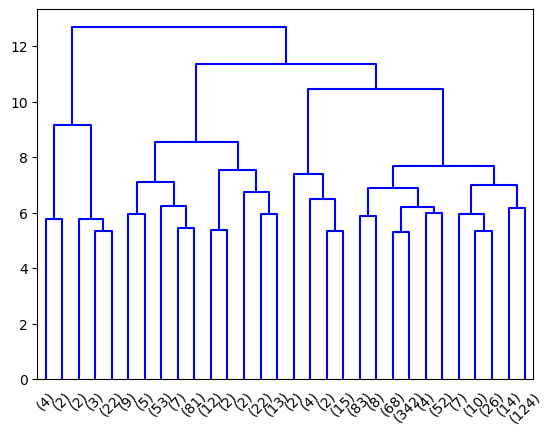

In [ ]:
data_dist = pdist(data_random_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.1, truncate_mode='lastp')
clusters = cut_tree(data_link, n_clusters=2).flatten()

Devi prednere sample anche dal target

In [ ]:
metrics.confusion_matrix(data_target, clusters)


ValueError: Found input variables with inconsistent numbers of samples: [744474, 1000]

## 3) Classification

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report

Add the target variable

In [ ]:
data['ESR']=data_target
data.head()

,AGEP,SCHL,MAR,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,2.0,0.0,1.0,1.0,4.0,1.0,0.0,2.0,2.0,2.0,2.0,1
1,19.0,16.0,5.0,2.0,0.0,1.0,1.0,4.0,1.0,0.0,2.0,2.0,2.0,2.0,0
2,24.0,12.0,5.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,2.0,2.0,1.0,1.0,0
3,20.0,16.0,5.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,2.0,2.0,2.0,1
4,31.0,17.0,5.0,2.0,0.0,1.0,3.0,4.0,4.0,0.0,2.0,2.0,2.0,1.0,1


prepare decision tree

In [ ]:
predictors = [col for col in data.columns if col != 'ESR']
X = data[predictors].values
y = data['ESR']

Split in training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

Build decision tree

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Features iportance

In [ ]:
for col, imp in zip(predictors, clf.feature_importances_):
    print(col, imp)
print(clf.classes_)

AGEP 0.7088378217285067
SCHL 0.06898758113826874
MAR 0.03492356224835205
DIS 0.06152759914245324
ESP 0.0007640622241918589
CIT 0.02047821563701505
MIG 0.015726905823860056
MIL 0.0220407283021323
ANC 0.03065334630153008
NATIVITY 0.005281244692562728
DEAR 0.004005675659007779
DEYE 0.003904731482965313
DREM 0.004224329010652146
SEX 0.018644196608502007
[0 1]


Apply on training set 

In [ ]:
y_pred = clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Accuracy 0.8567423546094936
F1-score [0.86569425 0.8465119 ]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87    285044
           1       0.82      0.87      0.85    236087

    accuracy                           0.86    521131
   macro avg       0.86      0.86      0.86    521131
weighted avg       0.86      0.86      0.86    521131



array([[240605,  44439],
       [ 30217, 205870]], dtype=int64)

Apply on test set

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.7920060176499824
F1-score [0.80488399 0.77730798]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80    122163
           1       0.75      0.80      0.78    101180

    accuracy                           0.79    223343
   macro avg       0.79      0.79      0.79    223343
weighted avg       0.79      0.79      0.79    223343



array([[95815, 26348],
       [20106, 81074]], dtype=int64)

Study possible overfitting and tune hyperparameters

In [ ]:
acc_train = list()
acc_test = list()
samples=[1, 2, 5, 10, 15, 20, 25]

for min_samples in samples:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=1500, min_samples_leaf=min_samples)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))



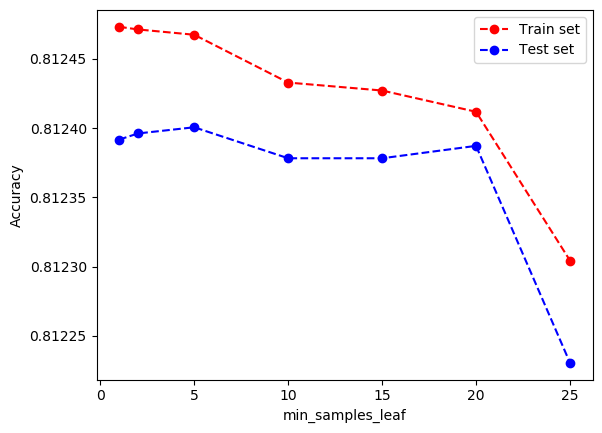

In [ ]:
plt.plot(samples, acc_train, 'o--', color='red', label="Train set")
plt.plot(samples, acc_test, 'o--', color='blue', label= "Test set")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
acc_train = list()
acc_test = list()
samples=[50, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]

for min_samples in samples:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=min_samples, min_samples_leaf=20)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))

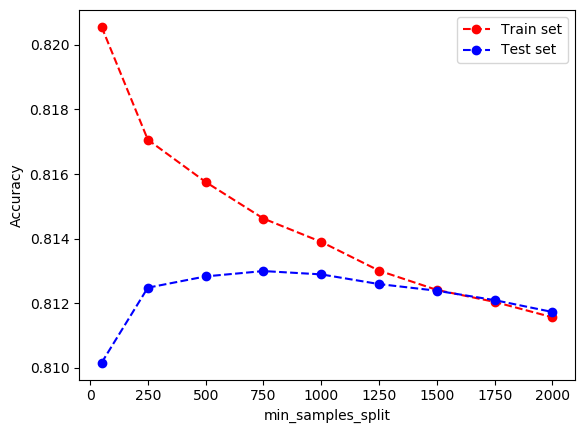

In [ ]:
samples=[50, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
plt.plot(samples, acc_train, 'o--', color='red', label="Train set")
plt.plot(samples, acc_test, 'o--', color='blue', label= "Test set")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We concliude that the best parameters are min_samples_leaf=20 min_samples_split=1500

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=1500, min_samples_leaf=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=1500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy Test %s' % accuracy_score(y_test, y_pred))
print('F1-score Test %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy Test 0.8123872250305584
F1-score Test [0.82211298 0.80153648]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82    122163
           1       0.77      0.84      0.80    101180

    accuracy                           0.81    223343
   macro avg       0.81      0.81      0.81    223343
weighted avg       0.82      0.81      0.81    223343



array([[96826, 25337],
       [16565, 84615]], dtype=int64)

ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred, average=None)

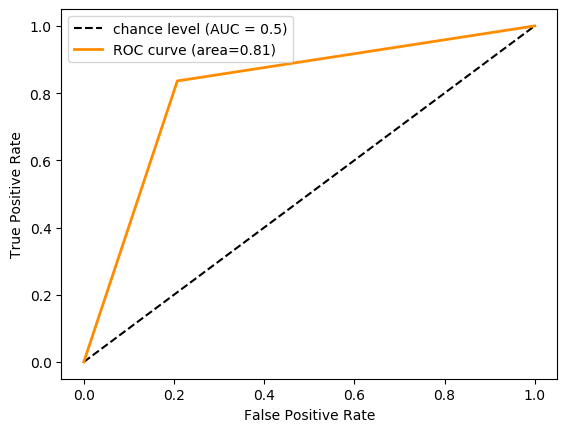

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area={roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.811 (+/- 0.003)
F1-score: 0.811 (+/- 0.003)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=1500, 
                             min_samples_leaf=20, 
                             class_weight=None)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8119305283801149

ROC curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred, average=None)

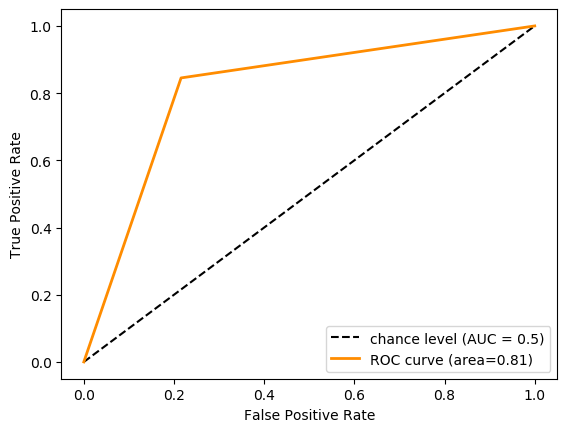

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area={roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Cross Validation

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

KeyboardInterrupt: 